#### 지도학습
+ 주어진 입력 x와 출력 y 쌍을 학습한 후에, 새로운 입력 x가 들어왔을 때 합리적인 출력값 y를 예측하는 것이다.
+ 전통적 프로그래밍은 사람이 고안한 함수 f()에 x를 넣어 y를 얻는다면,  
머신러닝은 (x, y)를 주면 함수 f()를 만들어낸다.
+ label : 학습과정에서 제공되는 데이터에 입력과 함께 제시된 바람직한 출력
+ feature : 관찰되는 현상에서 측정할 수 있는 개별적인 속성(attribute)
+ 지도학습의 대표적인 두 유형은 회귀와 분류이다.

### Regression(회귀)
+ 대표적인 지도학습 알고리즘으로, 관측된 데이터를 통해 독립변수와 종속변수 사이에 숨어있는 관계를 추정하는 것이다.
+ 다차원 공간에 존재하는 데이터들을 가장 잘 설명하는 수학적 함수를 찾는 것으로,  
계수(coefficient)에 따라 함수의 동작이 달라지는데, 회귀분석을 통해 데이터를 가장 잘 따르는 계수를 찾게 된다.
+ y = ax + b 일 때, 기울기 a와 절편 b를 어떻게 정하는가에 따라 다양한 직선을 그을 수 있고,  
각각의 직선은 데이터의 숨겨진 관계를 표현하며 x라는 독립변수에 대해 y라는 종속변수가 어떤 값을 가질지 예측하는 가설이 된다.  
+ 회귀분석은 데이터를 더 잘 설명하는 가설을 찾는 것이고,   
좋은 가설을 판단하기 위해 데이터를 이용해 가설의 오차(실제 y값 - 예측한 y값)를 계산한다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/dknife/ML/raw/main/data/'
data = pd.read_csv(url + 'pollution.csv')

data

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


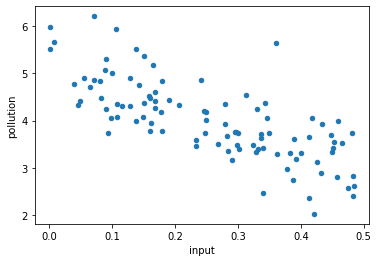

In [2]:
data.plot(kind='scatter', x='input', y='pollution');

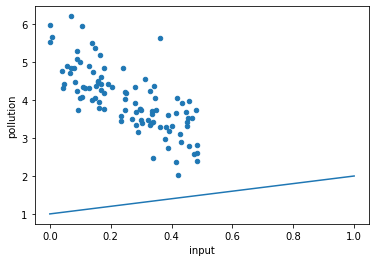

In [3]:
#가설 만들어보기
w, b = 1, 1         #사용자가 변경가능한 하이퍼파라미터
x0, x1 = 0.0, 1.0   #독립변수

def h(x, w, b):
    return w*x + b

y0 = h(x0, w, b)   #x가 0.0일 때 y의 값
y1 = h(x1, w, b)   #x가 1.0일 때 y의 값
data.plot(kind='scatter', x='input', y='pollution')
plt.plot([x0, x1], [y0, y1]);

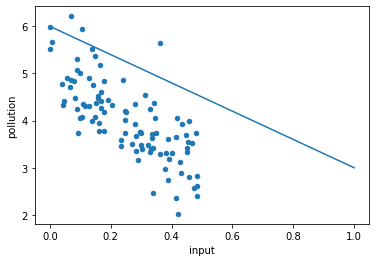

In [4]:
w, b = -3, 6         #사용자가 변경가능한 하이퍼파라미터

y0 = h(x0, w, b)   #x가 0.0일 때 y의 값
y1 = h(x1, w, b)   #x가 1.0일 때 y의 값
data.plot(kind='scatter', x='input', y='pollution')
plt.plot([x0, x1], [y0, y1]);

### 좋은 가설과 모델의 오차
+ MSE(평균제곱오차) : 예측치와 정답레이블 사이의 차이를 제곱하여 모두 더한 뒤 전체 데이터의 개수로 나눈 것
+ MAE(평균절대오차) : 오차를 제곱하지 않고 절대값을 취해 모두 더한 뒤 전체 데이터의 개수로 나눈 것

In [5]:
import numpy as np

y_hat = np.array(h(data.input, w, b))  #예측치
y = np.array(data.pollution)           #정답레이블
diff_square = (y_hat - y) ** 2         #차이를 제곱
mse = diff_square.sum() / len(y)       #모두 더한 값 / 전체 데이터 개수
mse

1.8370723699067515

In [6]:
#scikit-learn 패키지 함수 사용해보기
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_hat, y))
print(mae(y_hat, y))

1.8370723699067515
1.2455367986632924


In [7]:
w_list = np.arange(0.0, -10.0, -1.0)
y = np.array(data.pollution)               #정답레이블
for w in list(w_list):
    y_hat = np.array(h(data.input, w, b))  #예측치
    print(f'w : {round(w, 1)}, 평균제곱오차 : {mse(y_hat, y)}')

w : 0.0, 평균제곱오차 : 4.62665360004253
w : -1.0, 평균제곱오차 : 3.529072305490278
w : -2.0, 평균제곱오차 : 2.599211895445018
w : -3.0, 평균제곱오차 : 1.8370723699067515
w : -4.0, 평균제곱오차 : 1.242653728875476
w : -5.0, 평균제곱오차 : 0.8159559723511931
w : -6.0, 평균제곱오차 : 0.5569791003339029
w : -7.0, 평균제곱오차 : 0.46572311282360496
w : -8.0, 평균제곱오차 : 0.5421880098202994
w : -9.0, 평균제곱오차 : 0.7863737913239862


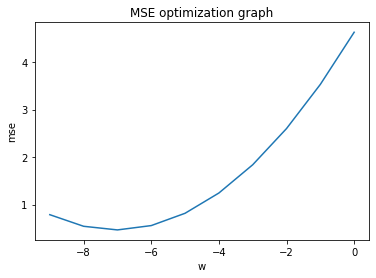

In [8]:
w_list = np.arange(0.0, -10.0, -1.0)
y_hat = [h(data.input, w, b) for w in w_list]
mse_list = [mse(y_pred, y) for y_pred in y_hat]
df = pd.DataFrame({'w':w_list,
                   'mse':mse_list}).set_index('w')

plt.title('MSE optimization graph')
plt.ylabel('mse')
plt.xlabel('w')
plt.plot(df);

위의 오차함수 곡선에서 최적해를 찾기 위해서는 곡선의 미분을 구해야 한다.  
미분을 통해 오차의 기울기를 알고 있다면, 오차가 줄어드는 방향을 구할수 있다.

In [9]:
#오차 구하기
w, b = -7, 6

x = data['input'].to_numpy()  #array로 변형
y = data['pollution'].to_numpy()

y_pred = h(x, w, b)
error = (y_pred - y)
error

array([-5.42649882e-01,  4.10794377e-01,  9.00041203e-01,  7.76763906e-01,
        3.39109446e-01,  7.84176508e-01, -4.73997026e-01,  2.73937749e-01,
        7.26910081e-02,  8.77919422e-01,  2.22985833e-01, -4.28271376e-01,
        5.80487170e-02,  1.03238562e+00, -5.60467689e-01, -1.10792057e+00,
        6.08450106e-01,  9.13942243e-01,  3.03497675e-03,  7.72020278e-02,
        1.96812583e-02,  4.31868095e-01,  1.59783296e-01, -8.37695087e-01,
        2.97984904e-01,  1.24581023e+00,  3.72864985e-01, -9.85511863e-01,
        1.09118137e+00,  2.37389023e-01,  9.97556589e-02,  1.61186810e-01,
       -3.40588714e-01, -6.85926470e-01,  1.60404192e+00,  5.80369239e-01,
       -2.07589591e-01,  6.67058879e-01, -7.04656204e-01,  5.65583612e-01,
       -7.85403127e-01, -1.19218298e+00,  1.12819656e-01,  4.04789369e-01,
        2.56022519e-01, -9.65039063e-01,  3.59392620e-01,  9.49829467e-01,
       -7.33628663e-02, -2.17195764e+00,  9.43158474e-01,  1.81317463e-01,
        1.17946287e-02,  

+ 최소제곱법(leat squares approimation) : 오차를 제곱하여 오차 곡선의 기울기를 따라 내려가며 기울기가 0인 극소점을 찾는 방법

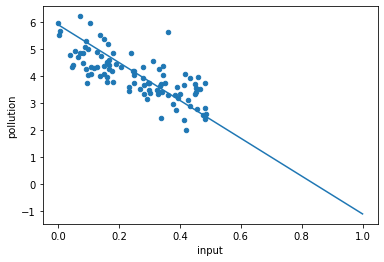

In [10]:
learning_rate = 0.005
w -= learning_rate * (error * x).sum()
b -= learning_rate * error.sum()

data.plot(kind='scatter', x='input', y='pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)]);

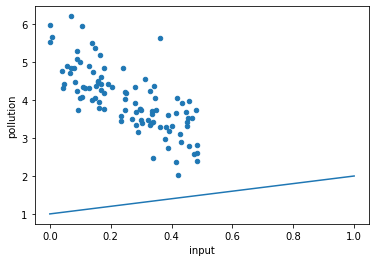

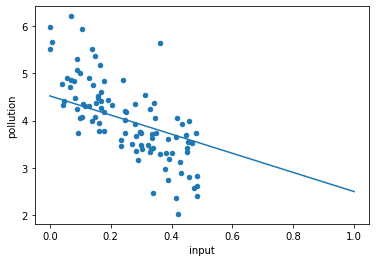

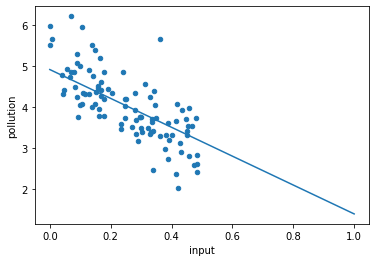

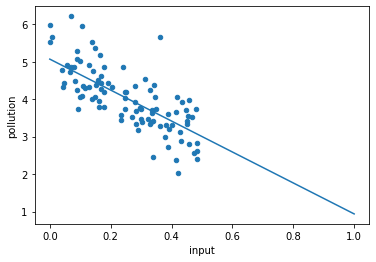

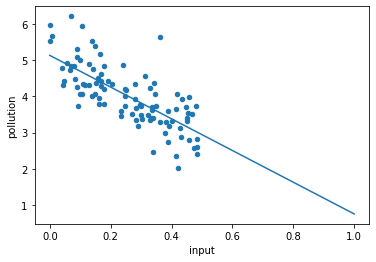

In [11]:
#for문을 이용해 오차 반복적으로 줄여나가기
def h(x, param):
    return param[0] * x + param[1]

learning_iter = 1000   #학습 반복 횟수
learning_rate = 0.0025 #학습률

param = [1, 1]   #w, b

x = data['input'].to_numpy()
y = data['pollution'].to_numpy()

for i in range(learning_iter):
    if i % 200 == 0:
        data.plot(kind='scatter', x='input', y='pollution')
        plt.plot([0,1], [h(0,param), h(1,param)])
    error = (h(x,param) - y)
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

## sklearn
+ scikit-learn : 선형회귀, K-NN 알고리즘, 서포트벡터머신, k-means 등 다양한 머신러닝 알고리즘을 쉽게 구현할 수 있는 라이브러리


In [12]:
from sklearn import linear_model

x = data['input'].to_numpy()
y = data['pollution'].to_numpy()
print(x.shape)

x = x[:, np.newaxis]    #선형회귀모델의 입력 형식에 맞게 차원 증가
print(x.shape)

(100,)
(100, 1)


In [13]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

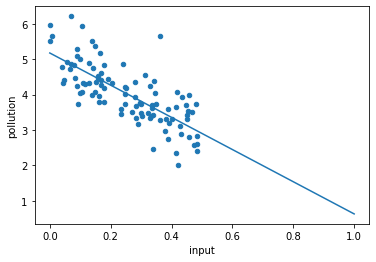

In [14]:
data.plot(kind='scatter', x='input', y='pollution')

y_pred = model.predict([[0], [1]])
plt.plot([0,1], y_pred);

#### 회귀분석의 학습, 최적화
+ numpy의 선형대수 submodule인 linalg를 이용하면 정규방정식을 풀 수 있고,  
이를 이용해 바로 최적 파라미터를 계산해낼 수 있다.
+ 정규방정식 유도
    + theta = (X.T * X)의 역행렬 * X.T * y

In [15]:
url = 'https://github.com/dknife/ML/raw/main/data/'
data = pd.read_csv(url + 'pollution.csv')

x = data['input'].to_numpy()
y = data['pollution'].to_numpy()
x = x[:, np.newaxis]
print(x.shape, x[0])

X = np.c_[np.ones((len(x), 1)), x]  #편향을 파라미터 theta로 다루기 위해 np.c_ 를 이용해 각 행마다 1을 원소로하는 벡터를 생성해 입력 데이터에 병합
print(X.shape, X[0])

(100, 1) [0.24055707]
(100, 2) [1.         0.24055707]


In [16]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 5.17550358, -4.54449866])

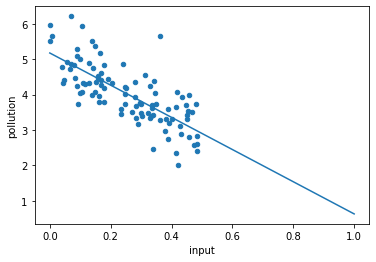

In [17]:
def h(x, theta):
    return x * theta[1] + theta[0]    #y = bx + w

data.plot(kind='scatter', x='input', y='pollution')  #실제 데이터
plt.plot([0,1], [h(0, theta), h(1, theta)]);         #가설

### 다변량 선형회귀분석
+ 위에서는 하나의 입력에 대응하는 출력을 계산했다면, 여러개의 특징을 입력받는 경우 다변량(multivariate) 회귀분석이라고 한다.

In [18]:
import seaborn as sns

#target은 Life expectancy
url = 'https://github.com/dknife/ML/raw/main/data/'
data = pd.read_csv(url + 'life_expectancy.csv')
data.shape, data.columns

((2938, 22),
 Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
        'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
        'Measles', 'BMI', 'Under-five deaths ', 'Polio', 'Total expenditure',
        'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
        'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
       dtype='object'))

In [19]:
#특성 선택
data = data[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure',
             'Total expenditure', 'Hepatitis B', 'Measles', 'Polio',
             'BMI', 'GDP', 'Thinness 1-19 years', 'Thinness 5-9 years']]
data

,Life expectancy,Year,Alcohol,Percentage expenditure,Total expenditure,Hepatitis B,Measles,Polio,BMI,GDP,Thinness 1-19 years,Thinness 5-9 years
0,65.0,2015,0.01,71.279624,8.16,65.0,1154,6.0,19.1,584.259210,17.2,17.3
1,59.9,2014,0.01,73.523582,8.18,62.0,492,58.0,18.6,612.696514,17.5,17.5
2,59.9,2013,0.01,73.219243,8.13,64.0,430,62.0,18.1,631.744976,17.7,17.7
3,59.5,2012,0.01,78.184215,8.52,67.0,2787,67.0,17.6,669.959000,17.9,18.0
4,59.2,2011,0.01,7.097109,7.87,68.0,3013,68.0,17.2,63.537231,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,2004,4.36,0.000000,7.13,68.0,31,67.0,27.1,454.366654,9.4,9.4
2934,44.5,2003,4.06,0.000000,6.52,7.0,998,7.0,26.7,453.351155,9.8,9.9
2935,44.8,2002,4.43,0.000000,6.53,73.0,304,73.0,26.3,57.348340,1.2,1.3
2936,45.3,2001,1.72,0.000000,6.16,76.0,529,76.0,25.9,548.587312,1.6,1.7


In [20]:
print(data.shape)
print(data.isna().sum())

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64


In [21]:
data.dropna(inplace=True)
print(data.shape)

(1853, 12)


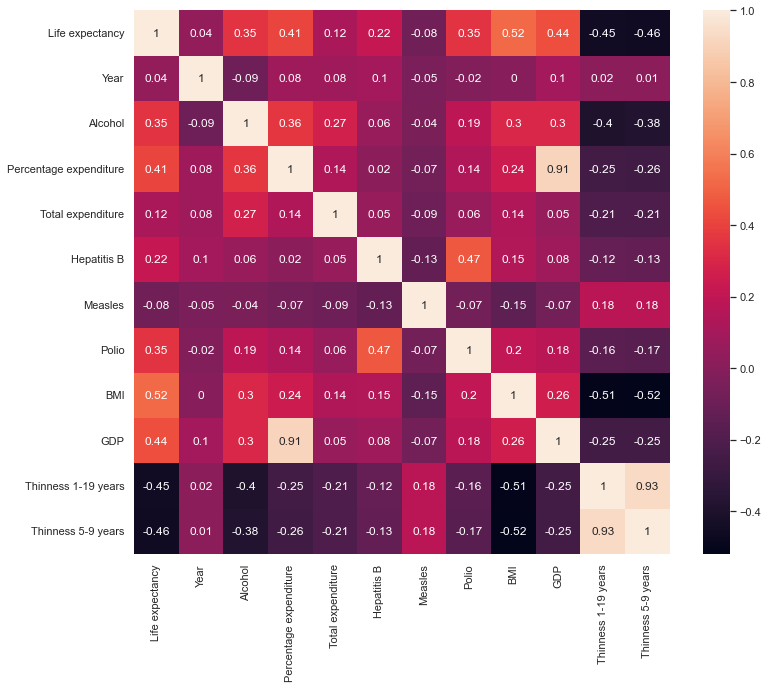

In [22]:
#corr() : 예측하려는 값과 상관관계가 있는지 상관행렬 확인 => seaborn 라이브러리의 heatmap() 함수로 시각화
#피어슨 상관계수로서 두 데이터의 공분산을 각각의 표준편차의 곱으로 나눈 값을 보여줌
sns.set(rc={'figure.figsize':(12,10)})
corr_matrix = data.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True);

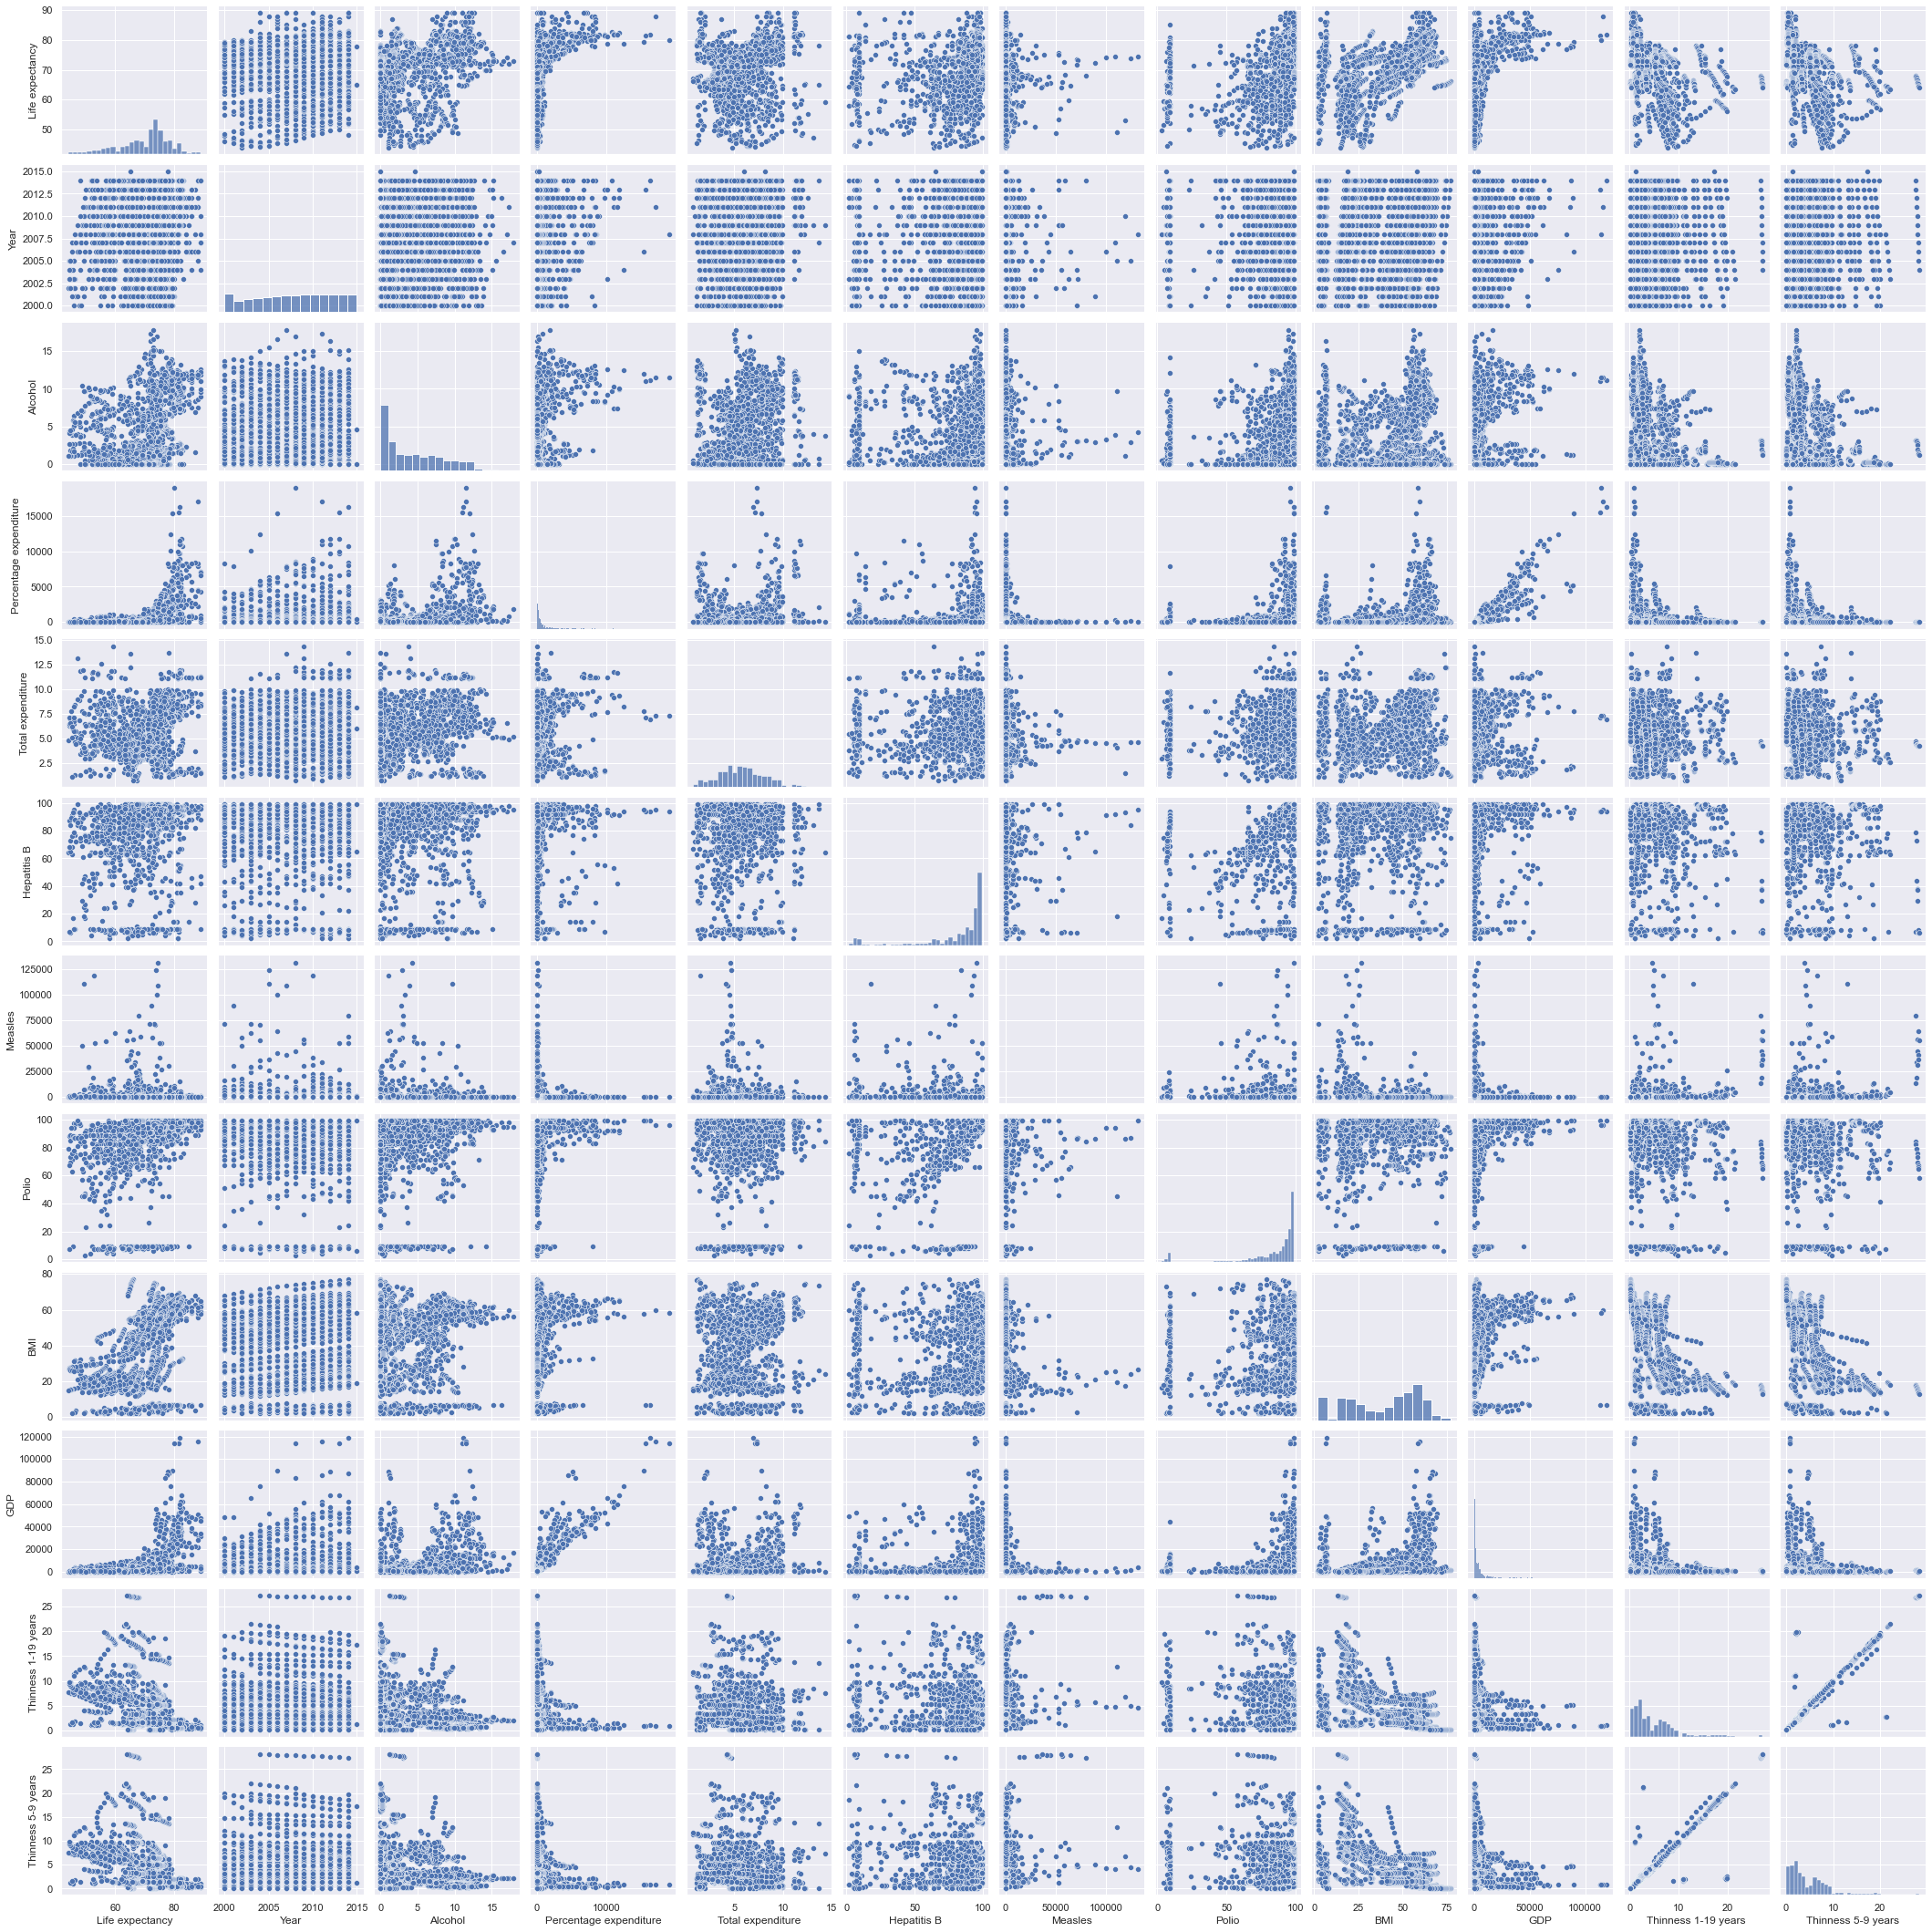

In [23]:
#pair plot
sns.pairplot(data);

pair plot 결과에서 Life expectancy와 다른 특징들의 상관관계 그래프를 보고, 영향력 있어보이는 특징을 고른다.  
=> Alcohol, Percentage expenditure, Polio, BMI, GDP, Thinness 1-19 years 선택

In [24]:
X = data[['Alcohol', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]   #기대수명을 예측하는 데 사용할 특징 6개
y = data['Life expectancy']                       #target

print(X.shape)
print(y.shape)

(1853, 6)
(1853,)


### 데이터를 훈련용/검증용으로 분리
+ 학습 과정에서 데이터가 알려주는 정답과 함수 출력 사이의 오차를 가장 작게 만드는 방향으로 데이터를 학습하게 된다.
+ 따라서 학습에 사용된 데이터를 테스트에 다시 사용한다면 당연히 좋은 결과를 얻게 될 것이므로, 알고리즘의 성능을 제대로 검사할 수 없다.  

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1482, 6), (1482,), (371, 6), (371,))

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  #훈련용 데이터로 모델 학습

LinearRegression()

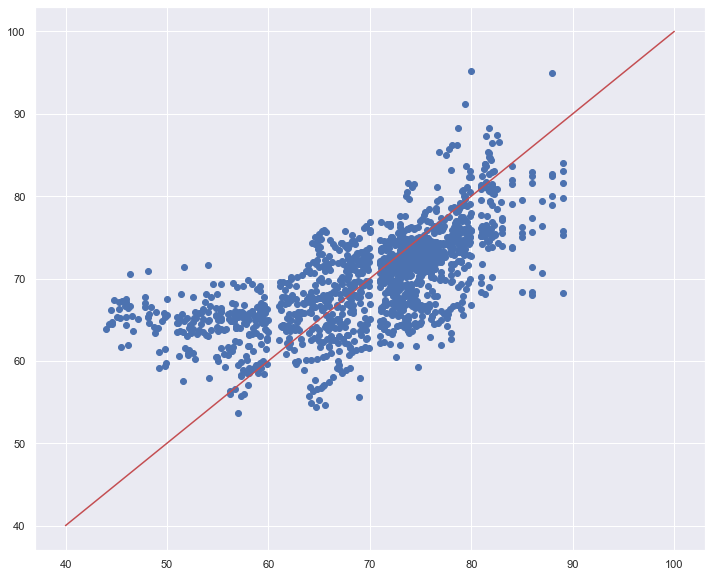

In [27]:
y_pred_train = model.predict(X_train)
plt.scatter(y_train, y_pred_train)
plt.plot([40,100], [40,100], color='r');   #y=x인 직선 => 점이 직선에 가까울수록 정답에 가까움

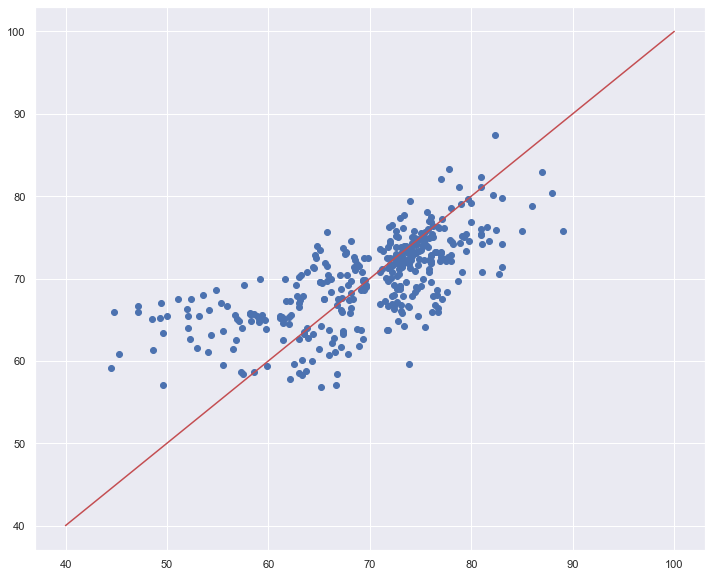

In [28]:
y_pred_test = model.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.plot([40,100], [40,100], color='r');

In [29]:
#훈련용/검증용 데이터의 평균제곱오차
from sklearn.metrics import mean_squared_error as mse

train_mse = mse(y_train, y_pred_train)
test_mse = mse(y_test, y_pred_test)

print(f'훈련용 데이터 MSE : {train_mse}')
print(f'검증용 데이터 MSE : {test_mse}')

훈련용 데이터 MSE : 42.40920356979244
검증용 데이터 MSE : 35.9071308270347


### 데이터 정규화(Normalization)
+ 특징별로 범위가 다른 데이터를 그대로 사용할 경우 적절한 학습이 이루어지지 않을 수도 있어 정규화가 필요하다.
+ 데이터를 0 ~ 1 사이 값으로 변경한다.
+ (x - min(x)) / (max(x) - min(x))

In [30]:
X.describe()

,Alcohol,Percentage expenditure,Polio,BMI,GDP,Thinness 1-19 years
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,4.392936,764.909479,84.834862,39.130275,6762.022729,4.809498
std,3.994051,1760.244275,21.706160,19.803882,12849.824365,4.385905
min,0.010000,0.000000,3.000000,2.000000,1.681350,0.100000
25%,0.660000,41.910524,83.000000,21.200000,526.531352,1.700000
50%,3.570000,169.202397,94.000000,44.900000,1937.995490,3.400000
75%,7.380000,591.775757,97.000000,56.400000,5836.177630,6.800000
max,17.870000,18961.348600,99.000000,77.100000,119172.741800,27.200000


In [31]:
from sklearn.preprocessing import normalize

X_norm = pd.DataFrame(normalize(X, axis=0))    #0번 축 기준(column 단위)으로 정규화
X_norm

,0,1,2,3,4,5
0,0.000039,0.000863,0.001592,0.010118,0.000935,0.061394
1,0.000039,0.000890,0.015387,0.009853,0.000980,0.062465
2,0.000039,0.000886,0.016448,0.009588,0.001011,0.063179
3,0.000039,0.000947,0.017775,0.009323,0.001072,0.063893
4,0.000039,0.000086,0.018040,0.009111,0.000102,0.064964
...,...,...,...,...,...,...
1848,0.017062,0.000000,0.017775,0.014356,0.000727,0.033553
1849,0.015888,0.000000,0.001857,0.014144,0.000725,0.034980
1850,0.017336,0.000000,0.019366,0.013932,0.000092,0.004283
1851,0.006731,0.000000,0.020162,0.013720,0.000878,0.005711


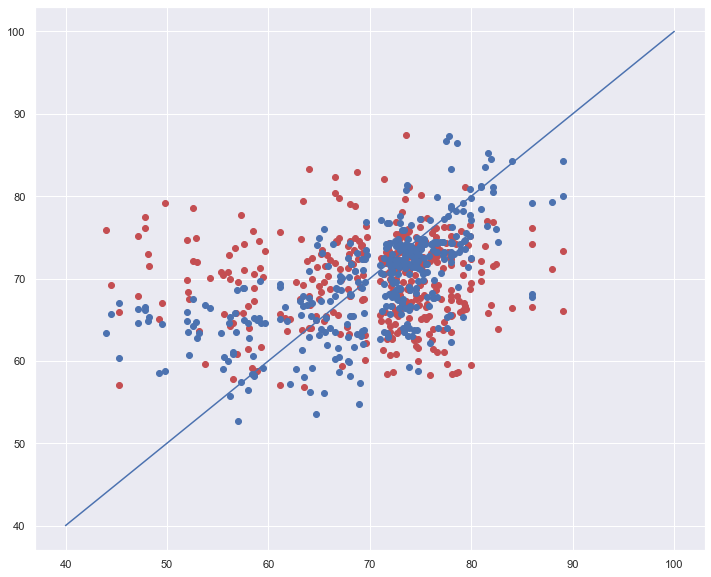

In [32]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

model.fit(X_norm_train, y_train)

y_norm_pred_train = model.predict(X_norm_train)
y_norm_pred_test = model.predict(X_norm_test)

plt.scatter(y_test, y_pred_test, color='r')              #원본
plt.scatter(y_test, y_norm_pred_test, color='b')         #정규화 후
plt.plot([40,100], [40,100]);                      

In [33]:
norm_train_mse = mse(y_train, y_norm_pred_train)
norm_test_mse = mse(y_test, y_norm_pred_test)

print(f'정규화 후 훈련데이터 MSE : {norm_train_mse}')
print(f'정규화 후 검증데이터 MSE : {norm_test_mse}')

정규화 후 훈련데이터 MSE : 40.55844853115898
정규화 후 검증데이터 MSE : 43.5736714862979


## 표준화(Standardization)
+ 정규화를 통해 얻은 데이터도 outlier가 존재한다면 histogram을 그려보았을 때 한쪽으로 몰려있게 된다.
+ 데이터가 골고루 분산되어있지 않으면 학습에 나쁜 영향을 미칠 수 있기 때문에, 표준화가 필요하다.
+ 데이터의 평균이 0, 분산이 1이 되게 한다.

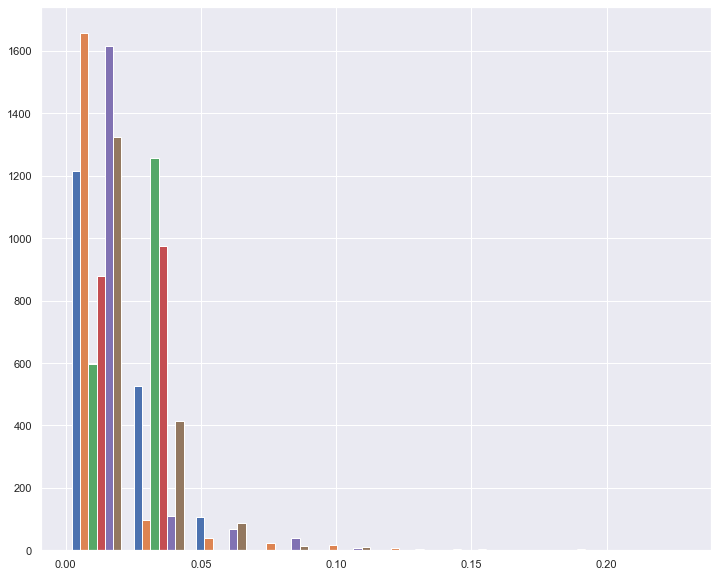

In [34]:
plt.hist(X_norm);  #0 가까운 값에 몰려있음

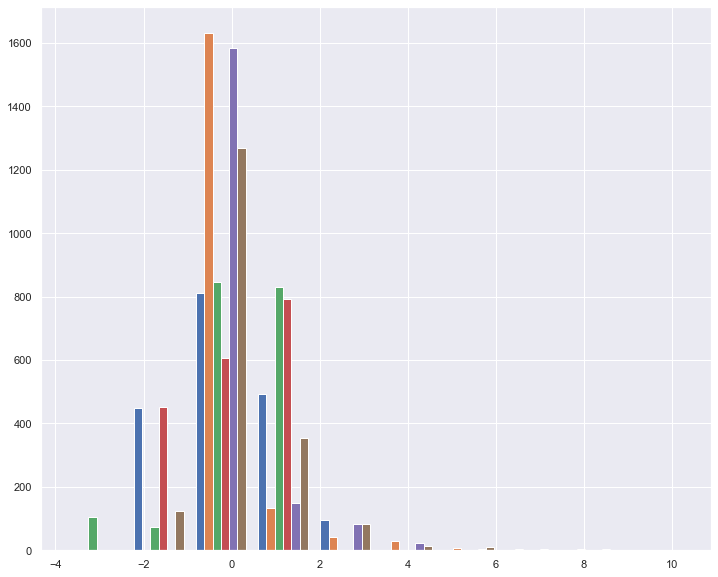

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.hist(X_scaled);

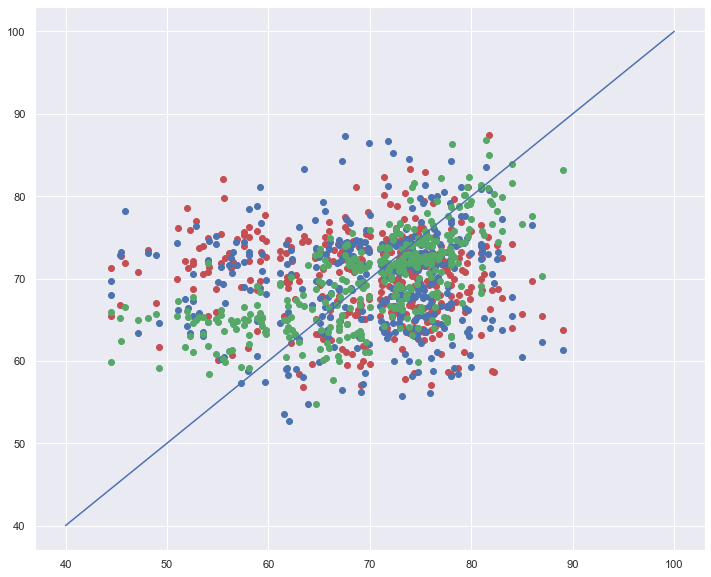

In [36]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

model = LinearRegression()
model.fit(X_scaled_train, y_train)

y_scaled_pred_train = model.predict(X_scaled_train)
y_scaled_pred_test = model.predict(X_scaled_test)

plt.scatter(y_test, y_pred_test, color='r')           #원본
plt.scatter(y_test, y_norm_pred_test, color='b')      #정규화 후
plt.scatter(y_test, y_scaled_pred_test, color='g')    #정규화 + 표준화 후
plt.plot([40,100], [40,100]);                       

In [37]:
scaled_train_mse = mse(y_train, y_scaled_pred_train)
scaled_test_mse = mse(y_test, y_scaled_pred_test)

In [39]:
print('----------원본 데이터 학습----------')
print(f'훈련 MSE : {train_mse}')
print(f'검증 MSE : {test_mse}\n')
print('--------정규화된 데이터 학습--------')
print(f'훈련 MSE : {norm_train_mse}')
print(f'검증 MSE : {norm_test_mse}\n')
print('-----정규화+표준화된 데이터 학습-----')
print(f'훈련 MSE : {scaled_train_mse}')
print(f'검증 MSE : {scaled_test_mse}\n')

----------원본 데이터 학습----------
훈련 MSE : 42.40920356979244
검증 MSE : 35.9071308270347

--------정규화된 데이터 학습--------
훈련 MSE : 40.55844853115898
검증 MSE : 43.5736714862979

-----정규화+표준화된 데이터 학습-----
훈련 MSE : 41.29751296165692
검증 MSE : 40.40849311737189

